# Advanced Python: ML with scikit-learn

by Michael T. Moen

scikit-learn is an open-source Python library that provides tools for data mining and machine learning. It is particularly useful for traditional machine learning tasks, such as regression, classification, clustering, and dimensionality reduction. The official documentation can be found at https://scikit-learn.org/, and its BSD-3-Clause license can be found on the [official GitHub repo](https://github.com/scikit-learn/scikit-learn?tab=BSD-3-Clause-1-ov-file).

## Setup

In [135]:
!pip install scikit-learn

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

## 1. Simple Linear Regression (SLR)

Simple linear regression (SLR) models a linear relationship between one input and one output. We can use `sklearn.linear_model` to perform this analysis

In [137]:
from sklearn.datasets import load_diabetes

# Load sample data provided by scikit-learn
diabetes = load_diabetes()

# View the description of the data
pprint(diabetes.DESCR)

('.. _diabetes_dataset:\n'
 '\n'
 'Diabetes dataset\n'
 '----------------\n'
 '\n'
 'Ten baseline variables, age, sex, body mass index, average blood\n'
 'pressure, and six blood serum measurements were obtained for each of n =\n'
 '442 diabetes patients, as well as the response of interest, a\n'
 'quantitative measure of disease progression one year after baseline.\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 ':Number of Instances: 442\n'
 '\n'
 ':Number of Attributes: First 10 columns are numeric predictive values\n'
 '\n'
 ':Target: Column 11 is a quantitative measure of disease progression one year '
 'after baseline\n'
 '\n'
 ':Attribute Information:\n'
 '    - age     age in years\n'
 '    - sex\n'
 '    - bmi     body mass index\n'
 '    - bp      average blood pressure\n'
 '    - s1      tc, total serum cholesterol\n'
 '    - s2      ldl, low-density lipoproteins\n'
 '    - s3      hdl, high-density lipoproteins\n'
 '    - s4      tch, total cholesterol / HDL\n'
 '    - s

In [138]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target

# View head of the DataFrame
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Assumptions of SLR

In order for an SLR model to be statistically valid, the following assumptions must hold:

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of residuals

#### Linearity

To check for linearity, we can check a scatterplot of the data:

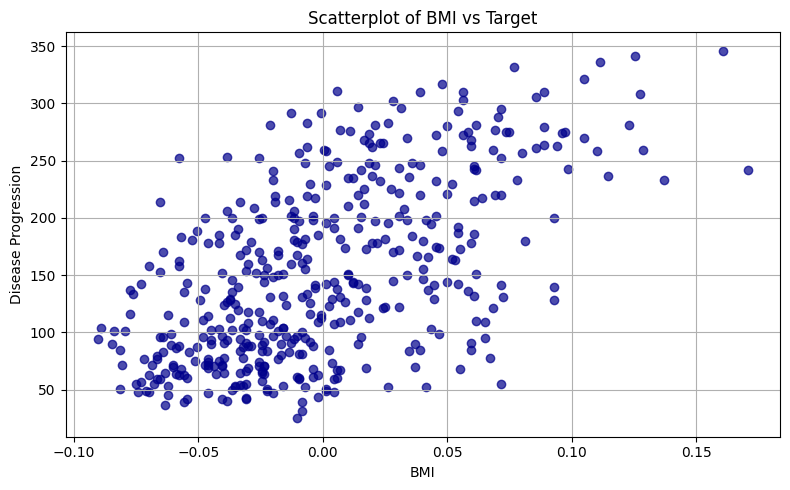

In [150]:
plt.figure(figsize=(8, 5))
plt.scatter(diabetes_df["bmi"], diabetes_df["target"], color="darkblue", alpha=0.7)
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Scatterplot of BMI vs Target")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot does not provide strong evidence that the data is not linearly distributed. To further check this assumption

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Independence

#### Homoscedasticity

#### Normality of Residuals

### Create the Regression Model

In [139]:
from sklearn.linear_model import LinearRegression

X = diabetes_df[["bmi"]]
y = diabetes_df["target"]

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

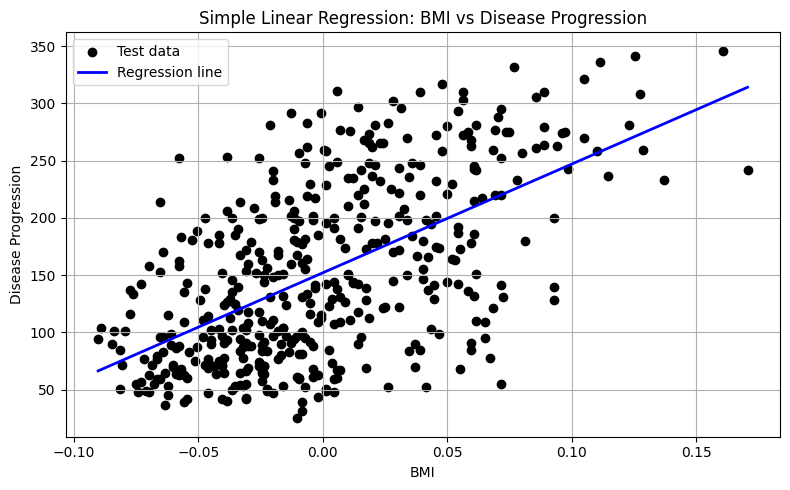

In [140]:
# Make predictions (for plotting)
x_line = pd.DataFrame({"bmi": np.linspace(X.min(), X.max(), 100).flatten()})
y_line = lm.predict(x_line)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="black", label="Test data")
plt.plot(x_line, y_line, color="blue", linewidth=2, label="Regression line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
lm.score(X, y)

0.3439237602253802

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1831)

In [143]:
training_lm = LinearRegression()
training_lm.fit(X_train, y_train)

LinearRegression()

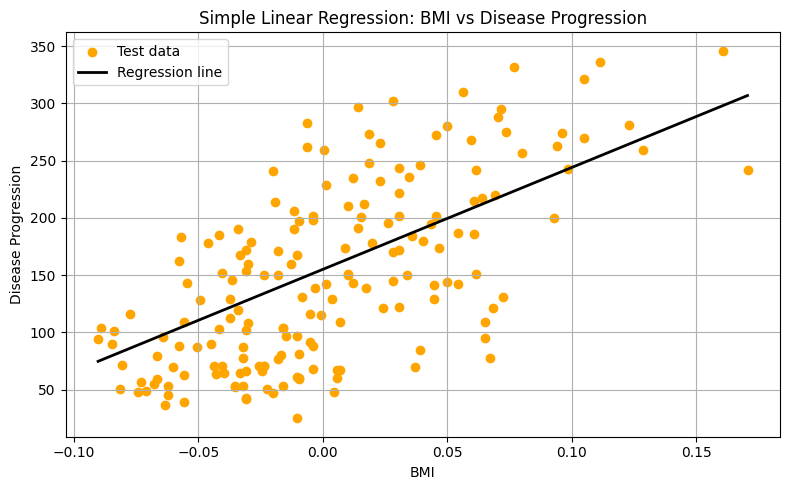

In [144]:
# Make predictions (for plotting)
x_line = pd.DataFrame({"bmi": np.linspace(X.min(), X.max(), 100).flatten()})
y_line = training_lm.predict(x_line)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="orange", label="Test data")
plt.plot(x_line, y_line, color="black", linewidth=2, label="Regression line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

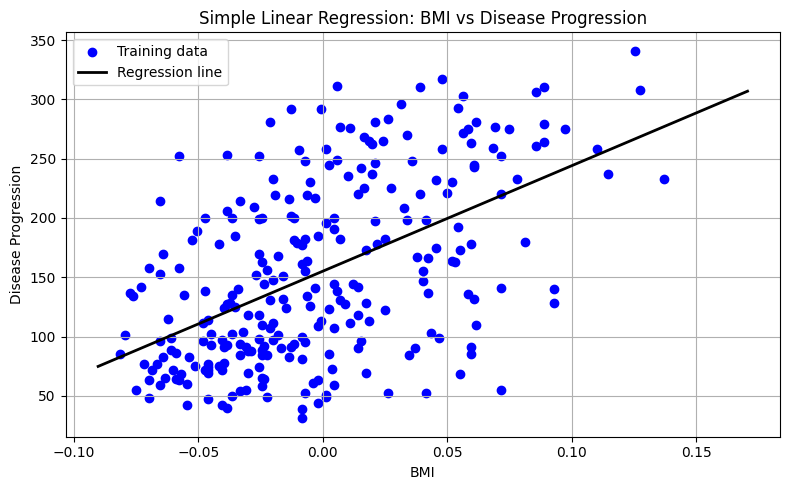

In [145]:
# Make predictions (for plotting)
x_line = pd.DataFrame({"bmi": np.linspace(X.min(), X.max(), 100).flatten()})
y_line = training_lm.predict(x_line)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(x_line, y_line, color="black", linewidth=2, label="Regression line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

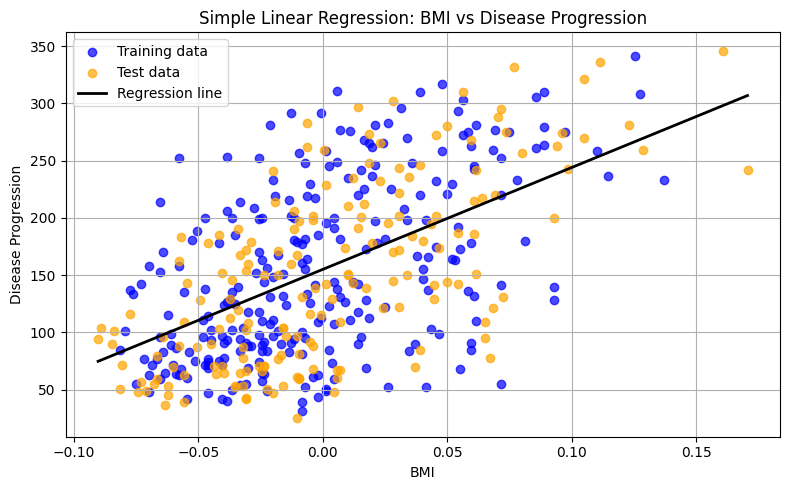

In [146]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Training data", alpha=0.7)
plt.scatter(X_test, y_test, color="orange", label="Test data", alpha=0.7)
plt.plot(x_line, y_line, color="black", linewidth=2, label="Regression line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [147]:
training_lm.score(X_train, y_train)

0.28034692951918405

In [148]:
training_lm.score(X_test, y_test)

0.4257425210852256

In [149]:
training_lm.score(X, y)

0.34107031905702156

## 2. Multiple Linear Regression

Couldn't we construct a more accurate model for predicting disease progression if we used the other health indicators in the dataset?

In [118]:
X_mlr = diabetes_df.drop(columns="target")

mlr = LinearRegression()
mlr.fit(X_mlr, y)

LinearRegression()

In [119]:
mlr.score(X_mlr, y)

0.5177484222203498

In [120]:
# Coefficients and intercept
coef_df = pd.DataFrame({
    "Feature": X_mlr.columns,
    "Coefficient": mlr.coef_
})
print("Intercept:", mlr.intercept_)
print(coef_df.sort_values(by="Coefficient", key=abs, ascending=False))

Intercept: 152.13348416289597
  Feature  Coefficient
4      s1  -792.175639
8      s5   751.273700
2     bmi   519.845920
5      s2   476.739021
3      bp   324.384646
1     sex  -239.815644
7      s4   177.063238
6      s3   101.043268
9      s6    67.626692
0     age   -10.009866


### Check for Multicollinearity

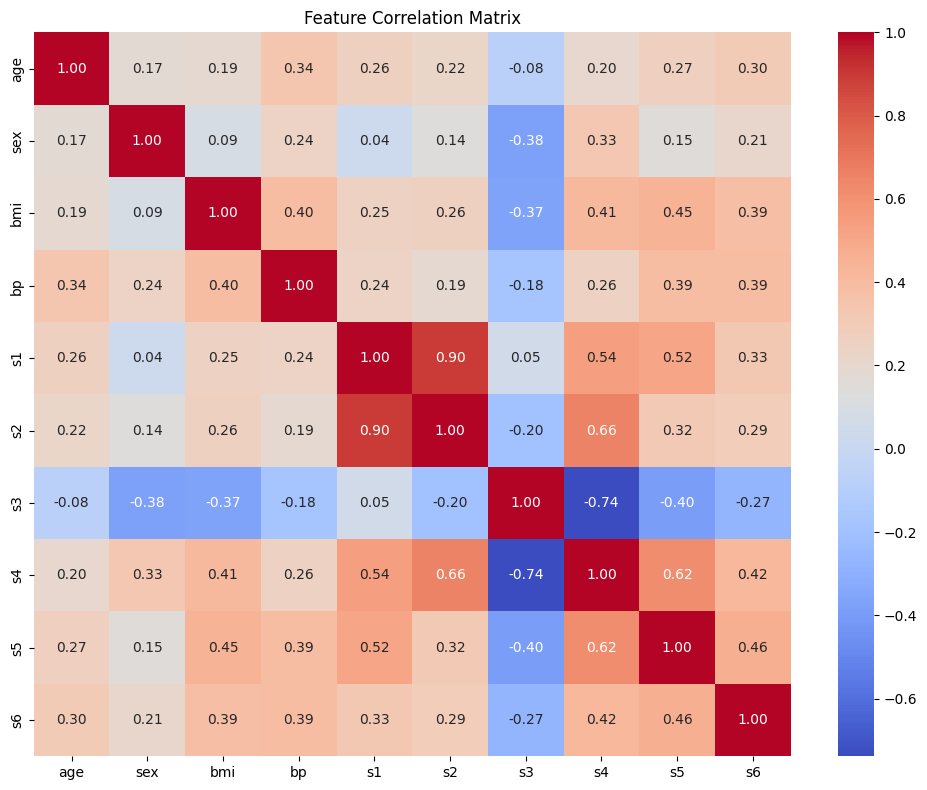

In [121]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(X_mlr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term for intercept
X_const = add_constant(X_mlr)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

   Feature        VIF
0    const   1.000000
1      age   1.217307
2      sex   1.278071
3      bmi   1.509437
4       bp   1.459428
5       s1  59.202510
6       s2  39.193370
7       s3  15.402156
8       s4   8.890986
9       s5  10.075967
10      s6   1.484623


### Variable Selection

In [123]:
from sklearn.feature_selection import RFE

model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=5)
selector.fit(X_mlr, y)

# Features selected
selected_features = X_mlr.columns[selector.support_]
print("Selected features:", list(selected_features))

Selected features: ['bmi', 'bp', 's1', 's2', 's5']


In [124]:
X_selected = X_mlr[selected_features]

lm_sel = LinearRegression()
lm_sel.fit(X_selected, y)

lm_sel.score(X_selected, y)

0.4989141940262618

In [125]:
# Add constant term for intercept
X_const = add_constant(X_selected)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

  Feature       VIF
0   const  1.000000
1     bmi  1.447599
2      bp  1.277197
3      s1  7.732403
4      s2  6.434692
5      s5  2.068061


### Lasso

In [126]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=1831)
lasso.fit(X_mlr, y)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": X_mlr.columns,
    "Lasso Coefficient": lasso.coef_
})
print(coef_df[coef_df["Lasso Coefficient"] != 0])

  Feature  Lasso Coefficient
0     age          -6.494693
1     sex        -235.993080
2     bmi         521.744369
3      bp         321.060777
4      s1        -569.438134
5      s2         302.453193
7      s4         143.698515
8      s5         669.922675
9      s6          66.835511


In [127]:
lasso.score(X_mlr, y)

0.5174210668198782

## 3. Logistic Regression

## 4. K-Nearest Neighbors

In [128]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [129]:
X = iris_df[iris.feature_names]
y = iris_df["target"]

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1831
)

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



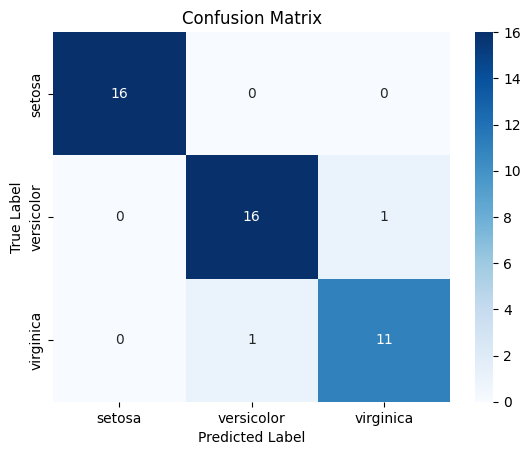

In [133]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and score
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [134]:
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f"k = {k}, Test Accuracy = {acc:.2f}")

k = 1, Test Accuracy = 0.96
k = 2, Test Accuracy = 0.96
k = 3, Test Accuracy = 0.96
k = 4, Test Accuracy = 0.96
k = 5, Test Accuracy = 0.96
k = 6, Test Accuracy = 0.96
k = 7, Test Accuracy = 0.96
k = 8, Test Accuracy = 0.96
k = 9, Test Accuracy = 0.96
k = 10, Test Accuracy = 0.96


## 5. Decision Trees and Random Forests

## 6. Support Vector Machines (SVM)

## 7. Clustering (K-Means)

## 8. Dimensionality Reduction (PCA)

## 9. Model Evaluation & Selection